- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
- The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 
- Objective is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

### Importing Data

In [2]:
#loading give data set
Countries_df=pd.read_csv('Country-data.csv')

In [3]:
#previewing the data
Countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


###  Understanding the data

In [4]:
#Size of the data
Countries_df.shape

(167, 10)

In [5]:
#check for data types of variables
Countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
##checking for missing values
Countries_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- There are no missing values in the given data set

<Figure size 2016x1008 with 0 Axes>

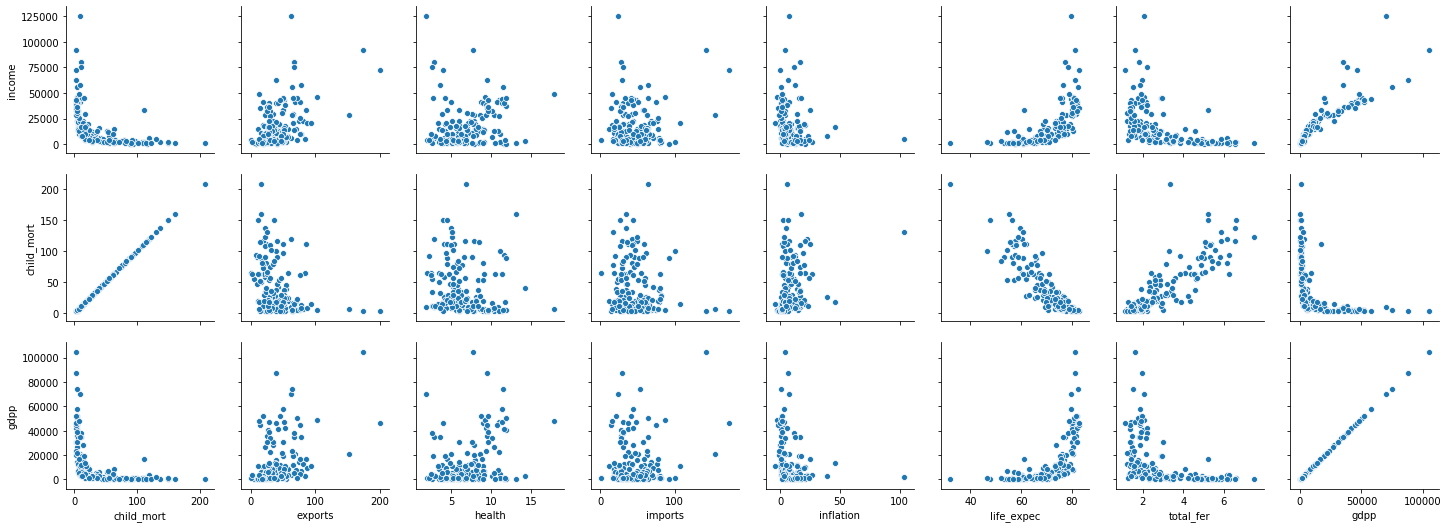

In [7]:
plt.figure(figsize=(28,14))
sns.pairplot(x_vars=['child_mort','exports','health','imports','inflation','life_expec','total_fer','gdpp'],y_vars=['income','child_mort','gdpp'],data=Countries_df)

### Outllier detection

- As mentioned in session performing outlier analysis only after PCA

In [8]:
#check the spread of data of variables
Countries_df.describe(percentiles=[0.01,0.05,0.25,0.50,.75,.90,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,3.909400,2.121800,12.988000,742.240000,-2.348800,47.160000,1.243200,331.620000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000


In [9]:
#create generic function which is used to plot box plot and kde plots 
'''
inputs-- dataframe,plot_type{'box' or 'kde'}, title of the plot
plots3X3 subplots plot using dataframe, type of plot and title
'''
def plot_graph(dataframe,plot_type,title):
    columns=list(dataframe.columns)[1:]
    if(plot_type=='box'):
        columns=list(dataframe.columns)[1:]
        fig,axs=plt.subplots(3,3,figsize=(18,10))
        fig.subplots_adjust(top=0.95)
        fig.suptitle(title, fontsize=16)
        sns.boxplot(dataframe[columns[0]],orient='v',ax=axs[0,0])
        sns.boxplot(dataframe[columns[1]],orient='v',ax=axs[0,1])
        sns.boxplot(dataframe[columns[2]],orient='v',ax=axs[0,2])
        sns.boxplot(dataframe[columns[3]],orient='v',ax=axs[1,0])
        sns.boxplot(dataframe[columns[4]],orient='v',ax=axs[1,1])
        sns.boxplot(dataframe[columns[5]],orient='v',ax=axs[1,2])
        sns.boxplot(dataframe[columns[6]],orient='v',ax=axs[2,0])
        sns.boxplot(dataframe[columns[7]],orient='v',ax=axs[2,1])
        sns.boxplot(dataframe[columns[8]],orient='v',ax=axs[2,2])
    elif(plot_type=='kde'):
        columns=list(dataframe.columns)
        fig,axs=plt.subplots(3,3,figsize=(18,10))
        fig.subplots_adjust(top=0.95)
        fig.suptitle(title, fontsize=16)
        sns.kdeplot(dataframe[columns[0]],ax=axs[0,0])
        sns.kdeplot(dataframe[columns[1]],ax=axs[0,1])
        sns.kdeplot(dataframe[columns[2]],ax=axs[0,2])
        sns.kdeplot(dataframe[columns[3]],ax=axs[1,0])
        sns.kdeplot(dataframe[columns[4]],ax=axs[1,1])
        sns.kdeplot(dataframe[columns[5]],ax=axs[1,2])
        sns.kdeplot(dataframe[columns[6]],ax=axs[2,0])
        sns.kdeplot(dataframe[columns[7]],ax=axs[2,1])
        sns.kdeplot(dataframe[columns[8]],ax=axs[2,2])

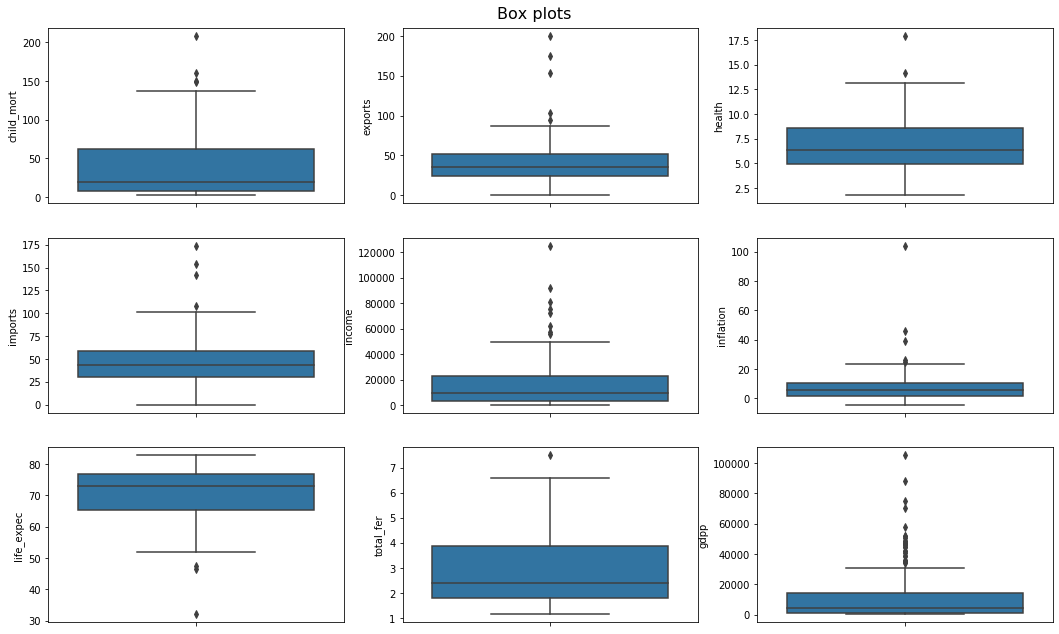

In [10]:
plot_graph(Countries_df,'box','Box plots')

<Figure size 2016x1008 with 0 Axes>

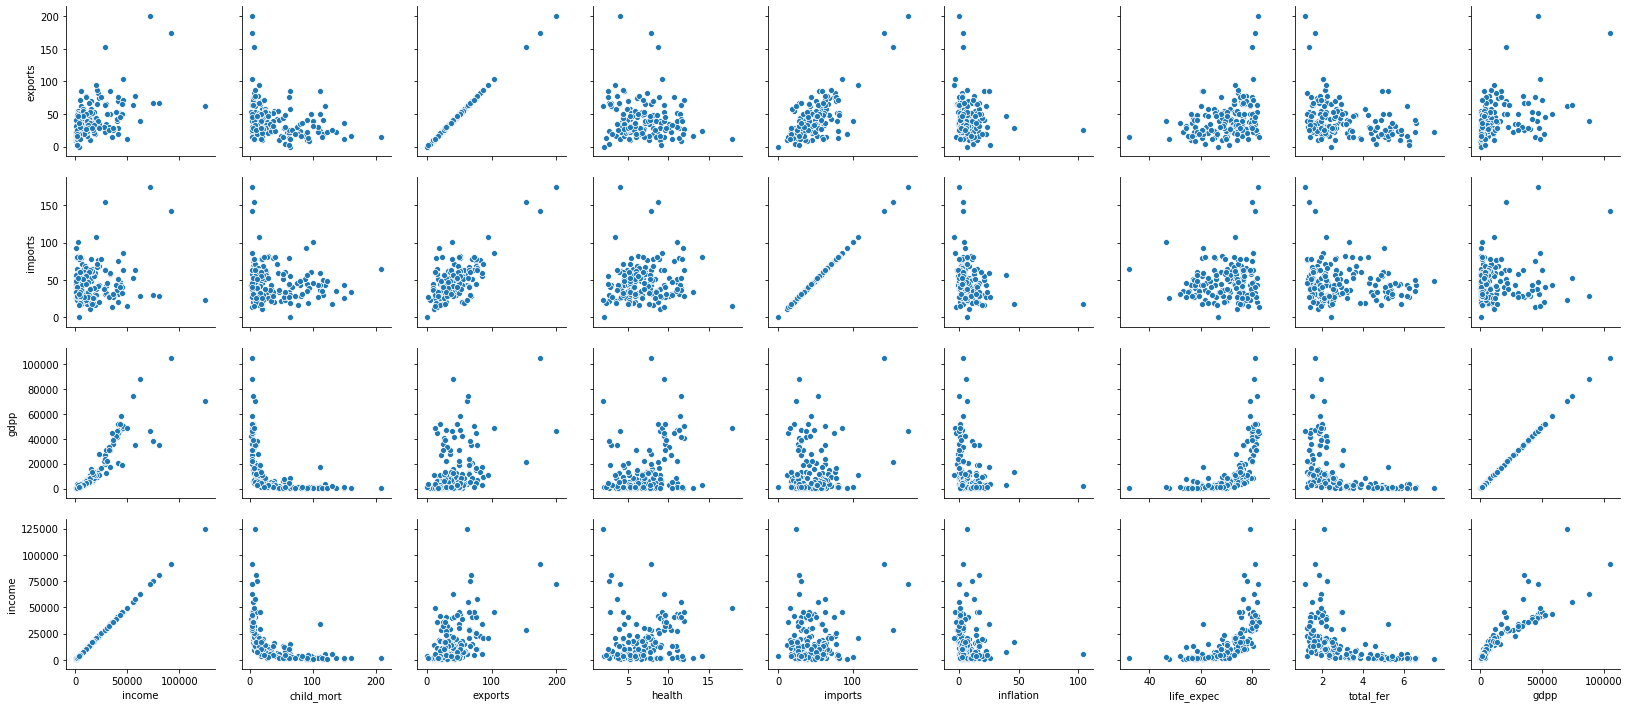

In [11]:
#finding relation between the columns
plt.figure(figsize=(28,14))
sns.pairplot(x_vars=['income','child_mort','exports','health','imports','inflation','life_expec','total_fer','gdpp'],
             y_vars=['exports','imports','gdpp','income'],data=Countries_df)

## Scaling Data

In [12]:
#scaling numerical data of countries df

In [13]:
#separating numerical columns to a new dataframe X
X=Countries_df.iloc[:,1:]

In [14]:
#previewing the data
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
#shape of the data
X.shape

(167, 9)

In [16]:
#Standardizing the data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
#Instantiation of StandardScaler
scaler=StandardScaler()

In [19]:
# scaling and transforming the original data to standard data having a mean 0 and standard deviation of 1
scaled_data=scaler.fit_transform(X)

In [20]:
#creating a dataframe with scaled data
scaled_df=pd.DataFrame(scaled_data,columns=X.columns)

In [21]:
#previewing the dataframe
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


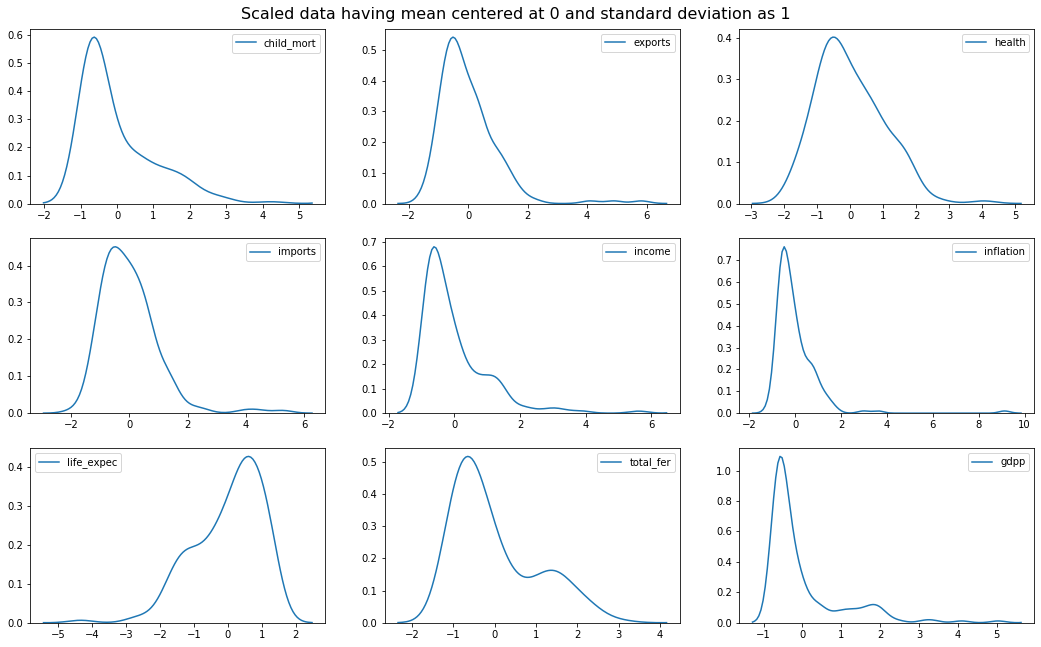

In [22]:
plot_graph(scaled_df,'kde','Scaled data having mean centered at 0 and standard deviation as 1')

## Principal Component Analysis

In [23]:
#Importing PCA and IncrementalPCA modules
from sklearn.decomposition import PCA,IncrementalPCA

In [24]:
#instantiate pca with a random state
pca=PCA(random_state=42)

In [25]:
#fit scaled data to pca
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
#Variance explained by different variables in descending order
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

### Determining optimium components

### a.Scree plot

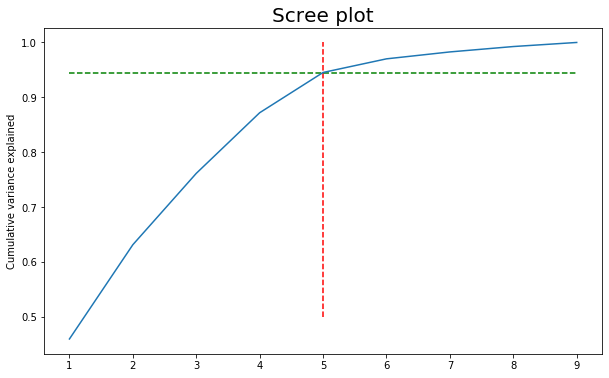

In [27]:
#plotting scree plot 
fig = plt.figure(figsize=[10,6])
plt.title("Scree plot",fontdict={'fontsize':20})
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=5, ymax=1, ymin=0.5, colors="r", linestyles="--")
plt.hlines(y=0.945, xmax=9, xmin=1, colors="g", linestyles="--")
plt.ylabel("Cumulative variance explained")
plt.show()

### b.Using percentage of variance

In [28]:
#unsupervised way of determining number of components for scaled data
pca_USV=PCA(0.945)

In [29]:
scaled_df_USV=pca_USV.fit_transform(scaled_df)

In [30]:
scaled_df_USV.shape

(167, 5)

- Both the method gave 5 components as optimum to explain 94.5% variance of scaled data

### Applying PCA to reduce dimensionality

In [31]:
#using incremental PCA to decrease memory and improve calculation performance
pca_Inc=IncrementalPCA(n_components=5)

In [32]:
#Fitting and transforming data to new basis in which explained variance is high
transformed_data=pca_Inc.fit_transform(scaled_df)

In [33]:
#preview shape of transformed data
transformed_data.shape

(167, 5)

In [34]:
# PCA has reduced dimensions from 9 columns to 5 columns

- Verifing the correlation after transformation using heatmap

In [35]:
correlation_mat=np.corrcoef(transformed_data.transpose())

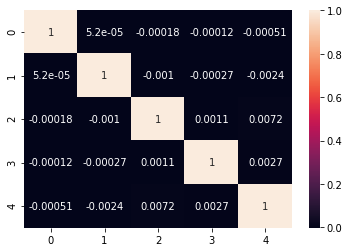

In [36]:
sns.heatmap(correlation_mat,annot=True)

- No correlation exist between the variables as all elements except diagonal elements are tending to zeros

##### Viewing linear relation between original variables with transformed variables

In [37]:
pca_Inc.components_

array([[-0.41967749,  0.28371974,  0.15090765,  0.16157087,  0.39861811,
        -0.1928264 ,  0.42549267, -0.40396116,  0.39266855],
       [ 0.19312245,  0.61357956, -0.24350339,  0.67130924,  0.02407378,
        -0.00332551, -0.22455856,  0.15219983, -0.04573737],
       [-0.03436069,  0.14687014, -0.6044529 , -0.30913862,  0.30002773,
         0.62984364,  0.12047131,  0.02795883,  0.11959861],
       [ 0.37107257,  0.00490633,  0.45432934, -0.07721714,  0.39426589,
         0.14920805, -0.19996777,  0.38322405,  0.53417883],
       [-0.18390053,  0.07043899,  0.51574709,  0.24222051, -0.25069755,
         0.71769058,  0.13980886, -0.08575814, -0.17810981]])

In [38]:
#linear relation of PC components with variables
pd.DataFrame(pca_Inc.components_,columns=scaled_df.columns,index=['PC1','PC2','PC3','PC4','PC5'])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
PC1,-0.419677,0.283720,0.150908,0.161571,0.398618,-0.192826,0.425493,-0.403961,0.392669
PC2,0.193122,0.613580,-0.243503,0.671309,0.024074,-0.003326,-0.224559,0.152200,-0.045737
PC3,-0.034361,0.146870,-0.604453,-0.309139,0.300028,0.629844,0.120471,0.027959,0.119599
PC4,0.371073,0.004906,0.454329,-0.077217,0.394266,0.149208,-0.199968,0.383224,0.534179
PC5,-0.183901,0.070439,0.515747,0.242221,-0.250698,0.717691,0.139809,-0.085758,-0.178110


- PC1 = - 0.42 x child_mort + 0.28 x exports + 0.15 x health + 0.16 x imports + 0.40 x income - 0.19 x inflation + 0.425 x life_expec - 0.4 x total_fer + 0.39 x gdpp
- PC2 = - 0.19 x child_mort + 0.61 x exports - 0.24 x health + 0.67 x imports + 0.02 x income - 0.003 x inflation - 0.224 x life_expec + 0.15 x total_fer - 0.046 x gdpp
- PC3 = - 0.034 x child_mort + 0.15 x exports - 0.6 x health - 0.31 x imports + 0.30 x income + 0.63 x inflation + 0.12 x life_expec + 0.028 x total_fer + 0.12 x gdpp
- PC4 = 0.37 x child_mort + 0.005 x exports + 0.45 x health - 0.08 x imports + 0.40 x income + 0.15 x inflation - 0.2 x life_expec + 0.4 x total_fer + 0.53 x gdpp
- PC5 = - 0.18 x child_mort + 0.07 x exports + 0.515 x health + 0.24 x imports - 0.25 x income + 0.717 x inflation + 0.139 x life_expec - 0.085 x total_fer - 0.178 x gdpp

In [39]:
#creating a data frame with columns as new PCA components
transformed_df=pd.DataFrame(transformed_data,columns=['PC'+str(i) for i in range(1,pca_Inc.n_components_+1)])

In [40]:
#previewing the data frame
transformed_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [41]:
#Components of scaled data without outliers

### Outlier Analysis After PCA

In [42]:
transformed_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [43]:
transformed_df.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.9,0.95,0.99]).round(5)

,PC1,PC2,PC3,PC4,PC5
count,167.00000,167.00000,167.00000,167.00000,167.00000
mean,0.00000,-0.00000,0.00000,0.00000,0.00000
std,2.03975,1.24725,1.08496,1.00037,0.81425
min,-4.90949,-2.99870,-2.74296,-1.59156,-2.81524
1%,-4.11604,-2.24768,-2.46208,-1.42306,-1.56821
5%,-3.07962,-1.76976,-1.44480,-1.18195,-1.16553
10%,-2.84223,-1.41998,-1.00202,-1.08389,-0.78128
25%,-1.38226,-0.75127,-0.52934,-0.78535,-0.39693
50%,0.02289,-0.09337,-0.23430,-0.30791,-0.07038
75%,1.22424,0.55051,0.41366,0.72648,0.28258


In [44]:
def box_plot(dataframe):
    columns=list(dataframe.columns)
    fig,axs=plt.subplots(2,3,figsize=(18,10))
    sns.boxplot(dataframe[columns[0]],orient='v',ax=axs[0,0])
    sns.boxplot(dataframe[columns[1]],orient='v',ax=axs[0,1])
    sns.boxplot(dataframe[columns[2]],orient='v',ax=axs[0,2])
    sns.boxplot(dataframe[columns[3]],orient='v',ax=axs[1,0])
    sns.boxplot(dataframe[columns[4]],orient='v',ax=axs[1,1])

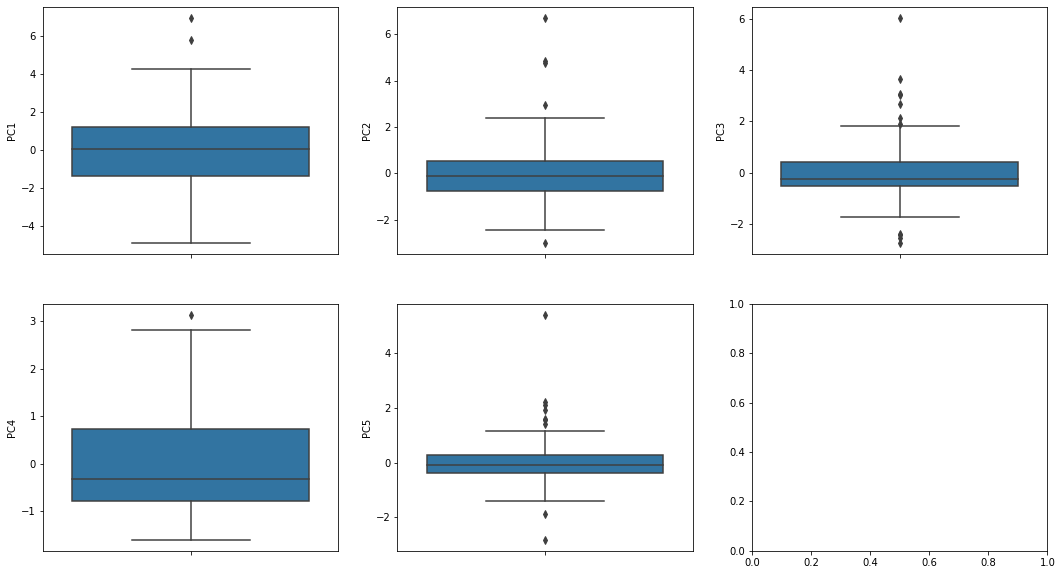

In [45]:
box_plot(transformed_df)

In [46]:
#removing outliers if any after PCA transformation

In [47]:
transformed_df_without_outliers=transformed_df.copy()

In [48]:
Q1=np.quantile(transformed_df_without_outliers['PC1'],0.05)
Q3=np.quantile(transformed_df_without_outliers['PC1'],0.95)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR))
print(Q3 + 1.5*IQR)
PC1_lower_limit=(Q1 - 1.5*IQR)
PC1_upper_limit=(Q3 + 1.5*IQR)

-12.354778371473287
6.195541976829275


In [49]:
transformed_df_without_outliers[(transformed_df_without_outliers['PC1']>PC1_upper_limit) | (transformed_df_without_outliers['PC1']<PC1_lower_limit)]

,PC1,PC2,PC3,PC4,PC5
91,6.917851,4.855313,0.960087,3.134611,-0.267129


In [50]:
Q1=np.quantile(transformed_df_without_outliers['PC2'],0.05)
Q3=np.quantile(transformed_df_without_outliers['PC2'],0.95)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR))
print(Q1 + 1.5*IQR)
PC2_lower_limit=(Q1 - 1.5*IQR)
PC2_upper_limit=(Q1 + 1.5*IQR)

-7.001482136619317
3.4619644793026145


In [51]:
transformed_df_without_outliers[(transformed_df_without_outliers['PC2']>PC2_upper_limit) | (transformed_df_without_outliers['PC2']<PC2_lower_limit)]

,PC1,PC2,PC3,PC4,PC5
91,6.917851,4.855313,0.960087,3.134611,-0.267129
98,3.679226,4.764726,-1.054303,-0.520945,1.602601
133,5.782972,6.684268,0.628385,0.090096,0.025476


In [52]:
Q1=np.quantile(transformed_df_without_outliers['PC3'],0.05)
Q3=np.quantile(transformed_df_without_outliers['PC3'],0.95)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR))
print(Q1 + 1.5*IQR)
PC3_lower_limit=(Q1 - 1.5*IQR)
PC3_upper_limit=(Q1 + 1.5*IQR)

-6.310769521739722
3.4211752458112272


In [53]:
transformed_df_without_outliers[(transformed_df_without_outliers['PC3']>PC3_upper_limit) | (transformed_df_without_outliers['PC3']<PC3_lower_limit)]

,PC1,PC2,PC3,PC4,PC5
113,-4.909489,-0.051773,6.010058,2.414875,5.404537
123,4.242888,-0.185168,3.655677,2.429596,-2.815243


In [54]:
Q1=np.quantile(transformed_df_without_outliers['PC4'],0.05)
Q3=np.quantile(transformed_df_without_outliers['PC4'],0.95)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR))
print(Q1 + 1.5*IQR)
PC4_lower_limit=(Q1 - 1.5*IQR)
PC4_upper_limit=(Q1 + 1.5*IQR)

-5.625896538334844
3.262003121476619


In [55]:
transformed_df_without_outliers[(transformed_df_without_outliers['PC4']>PC4_upper_limit) | (transformed_df_without_outliers['PC4']<PC4_lower_limit)]

,PC1,PC2,PC3,PC4,PC5


In [56]:
Q1=np.quantile(transformed_df_without_outliers['PC5'],0.05)
Q3=np.quantile(transformed_df_without_outliers['PC5'],0.95)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR))
print(Q1 + 1.5*IQR)
PC5_lower_limit=(Q1 - 1.5*IQR)
PC5_upper_limit=(Q1 + 1.5*IQR)

-4.579097561380703
2.2480455997973383


In [57]:
transformed_df_without_outliers[(transformed_df_without_outliers['PC5']>PC5_upper_limit) | (transformed_df_without_outliers['PC5']<PC5_lower_limit)]

,PC1,PC2,PC3,PC4,PC5
113,-4.909489,-0.051773,6.010058,2.414875,5.404537


In [58]:
transformed_df_without_outliers[(
(transformed_df_without_outliers['PC1']>PC1_upper_limit) | (transformed_df_without_outliers['PC1']<PC1_lower_limit)|
(transformed_df_without_outliers['PC2']>PC2_upper_limit) | (transformed_df_without_outliers['PC2']<PC2_lower_limit)|
(transformed_df_without_outliers['PC3']>PC3_upper_limit) | (transformed_df_without_outliers['PC3']<PC3_lower_limit)|
(transformed_df_without_outliers['PC4']>PC4_upper_limit) | (transformed_df_without_outliers['PC4']<PC4_lower_limit)|
(transformed_df_without_outliers['PC5']>PC5_upper_limit) | (transformed_df_without_outliers['PC5']<PC5_lower_limit))]


,PC1,PC2,PC3,PC4,PC5
91,6.917851,4.855313,0.960087,3.134611,-0.267129
98,3.679226,4.764726,-1.054303,-0.520945,1.602601
113,-4.909489,-0.051773,6.010058,2.414875,5.404537
123,4.242888,-0.185168,3.655677,2.429596,-2.815243
133,5.782972,6.684268,0.628385,0.090096,0.025476


In [59]:
list(Countries_df.iloc[[91,98,113,123,133],:]['country'].values)

['Luxembourg', 'Malta', 'Nigeria', 'Qatar', 'Singapore']

In [60]:
transformed_df_without_outliers_after_pca=transformed_df_without_outliers[~(
(transformed_df_without_outliers['PC1']>PC1_upper_limit) | (transformed_df_without_outliers['PC1']<PC1_lower_limit)|
(transformed_df_without_outliers['PC2']>PC2_upper_limit) | (transformed_df_without_outliers['PC2']<PC2_lower_limit)|
(transformed_df_without_outliers['PC3']>PC3_upper_limit) | (transformed_df_without_outliers['PC3']<PC3_lower_limit)|
(transformed_df_without_outliers['PC4']>PC4_upper_limit) | (transformed_df_without_outliers['PC4']<PC4_lower_limit)|
(transformed_df_without_outliers['PC5']>PC5_upper_limit) | (transformed_df_without_outliers['PC5']<PC5_lower_limit))]


In [61]:
transformed_df_without_outliers_after_pca.shape

(162, 5)

In [62]:
Countries_df_without_outliers_after_pca=Countries_df.copy()

In [63]:
Countries_df_without_outliers_after_pca=Countries_df_without_outliers_after_pca.set_index('country').drop(list(Countries_df.iloc[[91,98,113,123,133],:]['country'].values)).reset_index()

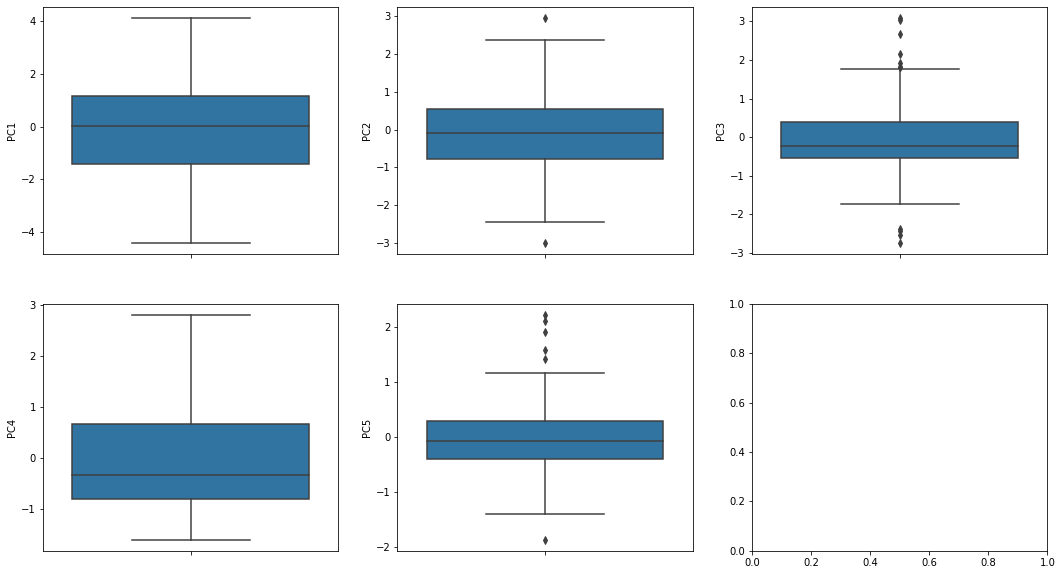

In [64]:
box_plot(transformed_df_without_outliers_after_pca)

### Hopkins test

In [65]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X) 
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)#437 unique samples from 4372 
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [66]:
hopkins(transformed_df)

0.834098057776247

In [67]:
hopkins(transformed_df_without_outliers_after_pca)

0.7705324285211552

### Clustering

## KMeans clustering

In [68]:
#importing required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [69]:
#creating a kmeans instance with number of cluster as 4   
kmeans=KMeans(n_clusters=4,max_iter=100,random_state=42)

In [70]:
#fitting the data
kmeans.fit(transformed_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [71]:
#preview the output label
kmeans.labels_

array([1, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 1,
       3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 2, 3,
       2, 3, 3, 3, 3, 1, 1, 3, 3, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 1, 3,
       1, 3, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 3, 3, 0, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       2, 2, 1, 1, 2, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3,
       1, 0, 3, 2, 3, 1, 2, 2, 3, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 3, 3, 3,
       3, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1])

#### Determining optmium K value

#### a.Elbow Curve

In [72]:
def elbow_curve(dataframe,title):
    ssd=[]
    range_clusters=[2,3,4,5,6,7,8,9,10]
    for num_cluster in range_clusters:
        kmeans=KMeans(num_cluster,max_iter=100,random_state=42)
        kmeans.fit(dataframe)
        ssd.append(kmeans.inertia_)
    plt.title(title)
    plt.plot(range_clusters,ssd)
    plt.show()

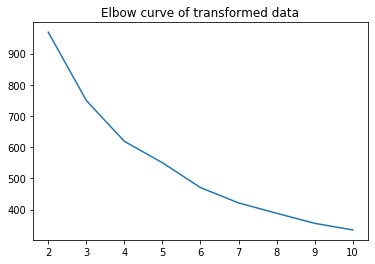

In [73]:
elbow_curve(transformed_df, "Elbow curve of transformed data")

#### b. Silhoutte score

In [74]:
def SilhoutteScore(dataframe):
    score=[]
    for num_clusters in [2,3,4,5,6,7,8,9]:
        kmeans=KMeans(num_clusters,max_iter=100,random_state=42)
        kmeans.fit(dataframe)
        score.append(silhouette_score(dataframe,kmeans.labels_))
        print("Silhoutte score for {0} clusters is {1}".format(num_clusters,score[num_clusters-2]))
    plt.plot([2,3,4,5,6,7,8,9],score)

Silhoutte score for 2 clusters is 0.304339954285527
Silhoutte score for 3 clusters is 0.3079553690964611
Silhoutte score for 4 clusters is 0.32718863090038236
Silhoutte score for 5 clusters is 0.24893752149058984
Silhoutte score for 6 clusters is 0.2592124946928743
Silhoutte score for 7 clusters is 0.2779717907933757
Silhoutte score for 8 clusters is 0.2489270342828852
Silhoutte score for 9 clusters is 0.24461008596308487


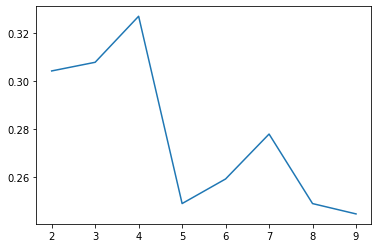

In [75]:
SilhoutteScore(transformed_df)

#### Based on silhoutte and elbow curve, going with 4 clusters for scaled data

In [76]:
#creating a kmeans instance with number of cluster as 4   
kmeans_without_outliers_after_pca=KMeans(n_clusters=4,max_iter=100,random_state=42)

In [77]:
#fitting the scaled data without outliers
kmeans_without_outliers_after_pca.fit(transformed_df_without_outliers_after_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [78]:
#preview the output label
kmeans_without_outliers_after_pca.labels_

array([2, 3, 0, 2, 3, 0, 0, 1, 1, 0, 1, 3, 0, 3, 3, 1, 3, 2, 3, 0, 3, 2,
       0, 1, 3, 2, 2, 3, 2, 1, 3, 2, 2, 0, 0, 0, 2, 2, 2, 3, 2, 3, 1, 3,
       1, 0, 0, 0, 3, 2, 2, 3, 3, 1, 1, 0, 2, 3, 1, 2, 1, 3, 0, 2, 2, 3,
       2, 3, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 3, 0, 2, 2, 1, 3, 2, 3, 3, 2,
       2, 0, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 0, 3, 0, 2, 0, 2, 0, 1, 1,
       2, 1, 0, 2, 3, 3, 0, 0, 3, 1, 0, 0, 2, 3, 0, 2, 3, 3, 2, 3, 1, 3,
       2, 1, 1, 0, 3, 2, 3, 1, 1, 0, 2, 3, 2, 2, 0, 3, 0, 3, 2, 3, 1, 1,
       1, 0, 0, 3, 0, 3, 2, 2])

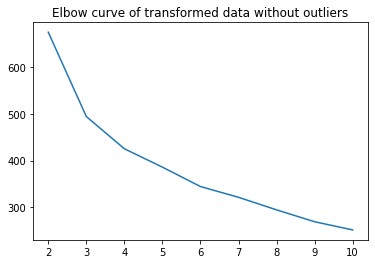

In [79]:
elbow_curve(transformed_df_without_outliers_after_pca,"Elbow curve of transformed data without outliers")

Silhoutte score for 2 clusters is 0.32372673825567594
Silhoutte score for 3 clusters is 0.3265106220926869
Silhoutte score for 4 clusters is 0.26601328908965827
Silhoutte score for 5 clusters is 0.25577773933860665
Silhoutte score for 6 clusters is 0.2738114179698978
Silhoutte score for 7 clusters is 0.22627874822640992
Silhoutte score for 8 clusters is 0.2744913890271807
Silhoutte score for 9 clusters is 0.23942321148335666


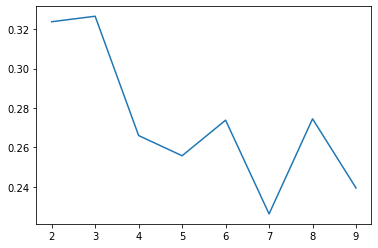

In [80]:
SilhoutteScore(transformed_df_without_outliers_after_pca)

#### Based on silhoutte and elbow curve, going with 3 clusters for data without outiers after pca

###  Model Building 

In [81]:
#model for scaled data
kmeans=KMeans(n_clusters=4,max_iter=500,random_state=42)
kmeans.fit(transformed_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [82]:
Cluster_id=kmeans.labels_

In [83]:
transformed_df['ClusterId']=Cluster_id

In [84]:
#model for scaled data without outliers after pca
kmeans_without_outliers_after_pca=KMeans(n_clusters=3,max_iter=500,random_state=42)
kmeans_without_outliers_after_pca.fit(transformed_df_without_outliers_after_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [85]:
ClusterId_without_outliers_after_pca=kmeans_without_outliers_after_pca.labels_

In [86]:
transformed_df_without_outliers_after_pca['ClusterId']=ClusterId_without_outliers_after_pca

In [87]:
transformed_df_without_outliers_after_pca['ClusterId'].shape

(162,)

In [88]:
Countries_df_without_outliers_after_pca.shape

(162, 10)

In [89]:
#merging the labes with original dataframe

In [90]:
Countries_df['ClusterId']=Cluster_id

In [91]:
Countries_df_without_outliers_after_pca['ClusterId']=ClusterId_without_outliers_after_pca

In [92]:
Countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [93]:
Countries_df_without_outliers_after_pca.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


### Data insights

In [94]:
#created lists color maps to use in palettes
colors_map2=['red','green']
colors_map3=['green','blue','red']
colors_map4=['orange','red','indigo','green']
colors_map5=['red','green','blue','orange','purple']
colors_map6=['violet','indigo','blue','green','orange','red']
colors_map7=['violet','indigo','blue','green','black','orange','red']
colors_map8=['violet','indigo','blue','green','yellow','orange','red','black']

In [95]:
def clusterplot(dataframe,hue,colormap):
    plt.figure(figsize=(12,8))
    sns.scatterplot('PC1','PC2',hue=hue,data=dataframe,palette=colormap)

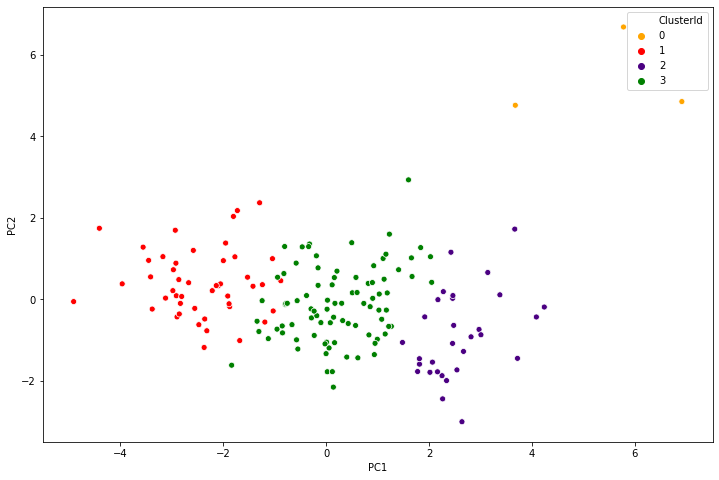

In [96]:
clusterplot(transformed_df,'ClusterId',colors_map4)

In [97]:
def box_scatterplot(dataframe,colormap,box_x,box_y,scatter_x):
    fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(16,8))
    sns.boxplot(box_x,box_y,data=dataframe,ax=axs[0],palette=colormap)
    sns.scatterplot(scatter_x,box_y,hue=box_x,palette=colormap,data=dataframe,ax=axs[1])

In [98]:
##gdpp

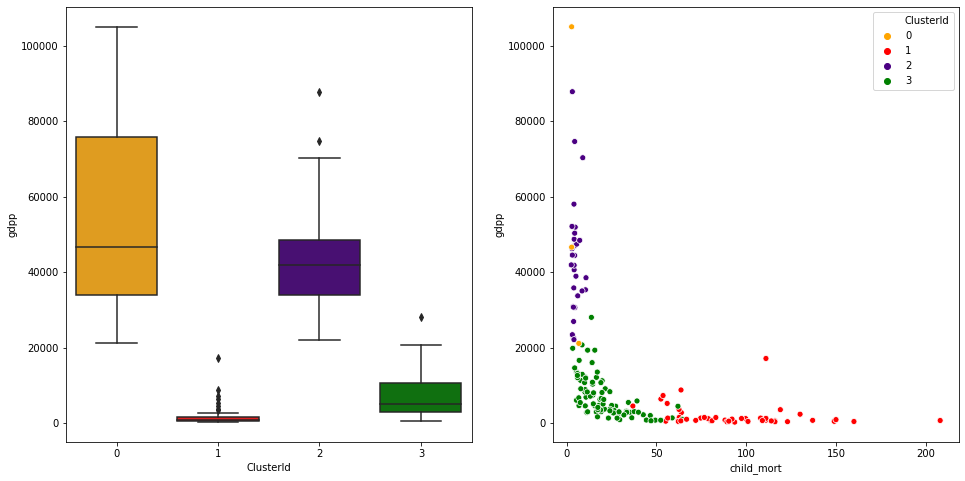

In [99]:
box_scatterplot(Countries_df,colors_map4,'ClusterId','gdpp','child_mort')

In [ ]:
#child_mort

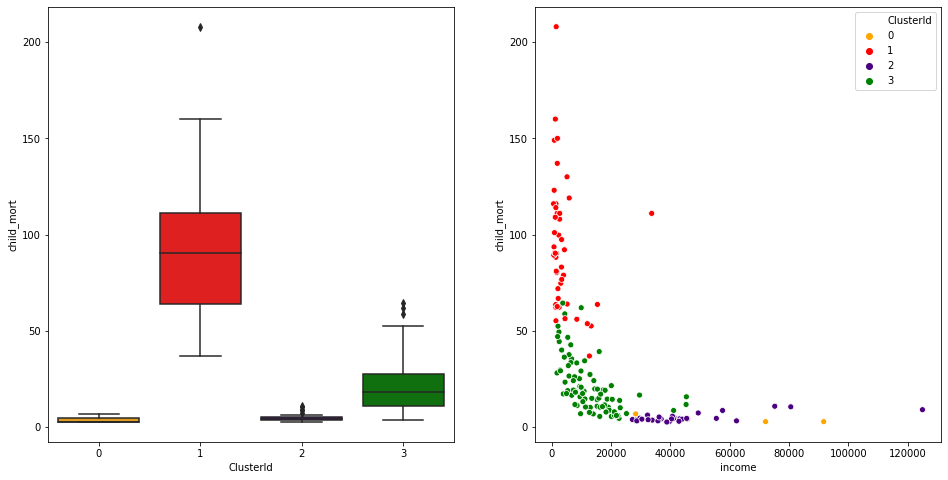

In [100]:
box_scatterplot(Countries_df,colors_map4,'ClusterId','child_mort','income')

In [ ]:
#income

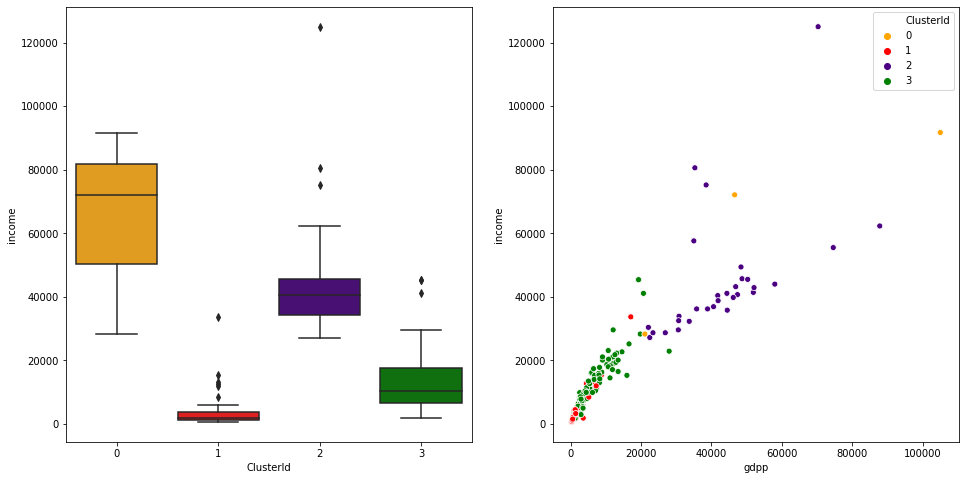

In [101]:
box_scatterplot(Countries_df,colors_map4,'ClusterId','income','gdpp')

- high child mortality, low income and low gdpp

#### Countries with 1 as cluster Id needs finanical aid  

In [103]:
# Data insights using data without outliers after pca

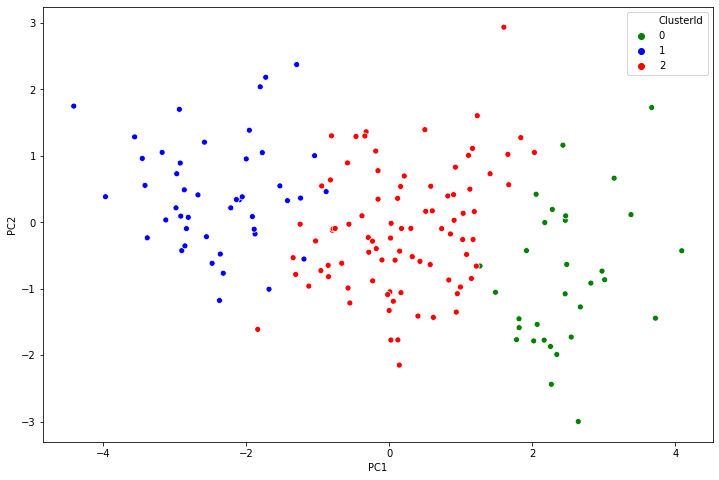

In [104]:
clusterplot(transformed_df_without_outliers_after_pca,'ClusterId',colors_map3)

In [105]:
## Box plot for the data without outliers after pca

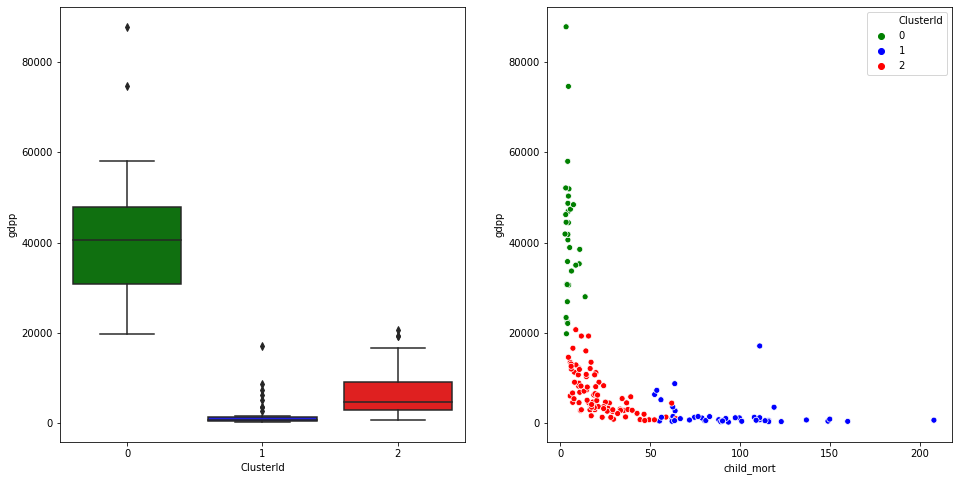

In [106]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map3,'ClusterId','gdpp','child_mort')

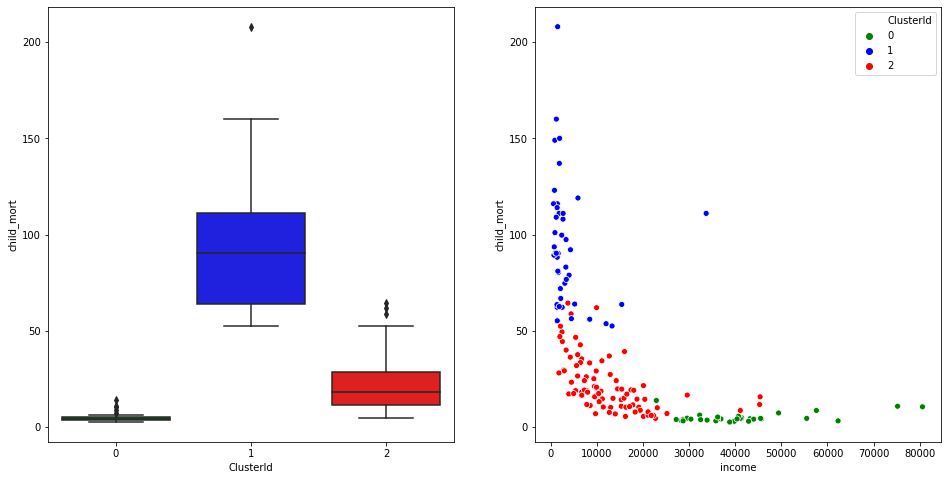

In [107]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map3,'ClusterId','child_mort','income')

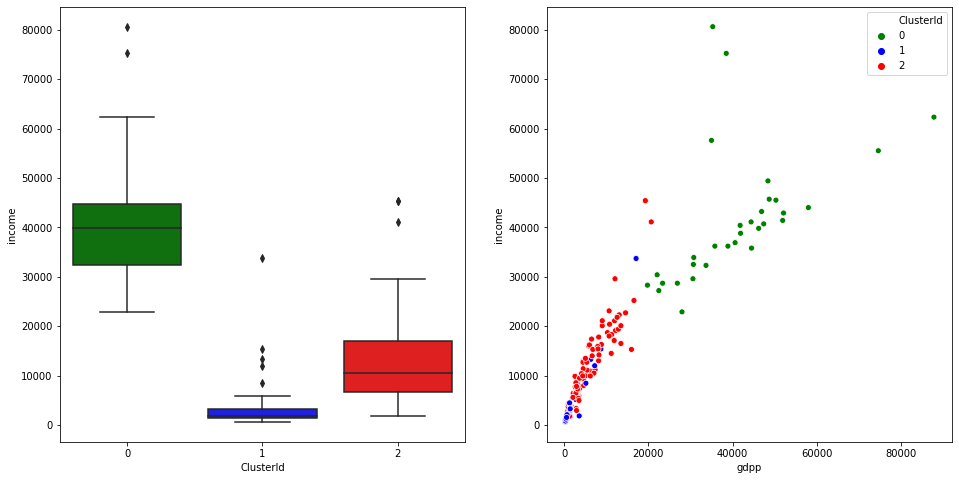

In [108]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map3,'ClusterId','income','gdpp')

In [109]:
#from above plots
#Countries with 0 as Cluster Id needs financial aid
#Cluster Id 0 signifies low income, low gdpp and high child mortality

- List of countries that need financial aid as per data without removal of outliers

- List of countries that need financial aid as per transformed data without outliers after pca analysis

In [112]:
Countries_df_without_outliers_after_pca.groupby('ClusterId').count()['country']

ClusterId
0    31
1    45
2    86
Name: country, dtype: int64

In [115]:
Countries_df_without_outliers_after_pca[Countries_df_without_outliers_after_pca['ClusterId']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


In [116]:
len(Countries_df_without_outliers_after_pca[Countries_df_without_outliers_after_pca['ClusterId']==1]) ##Iraq,Equatorial Guinea 

45

## Hierarchical Clustering

In [117]:
transformed_df.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,3
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,3
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,3


In [118]:
from scipy.cluster.hierarchy import linkage,cut_tree,dendrogram

In [119]:
single_linkage=linkage(transformed_df.iloc[:,:5],method='single')

In [120]:
### Single linkage

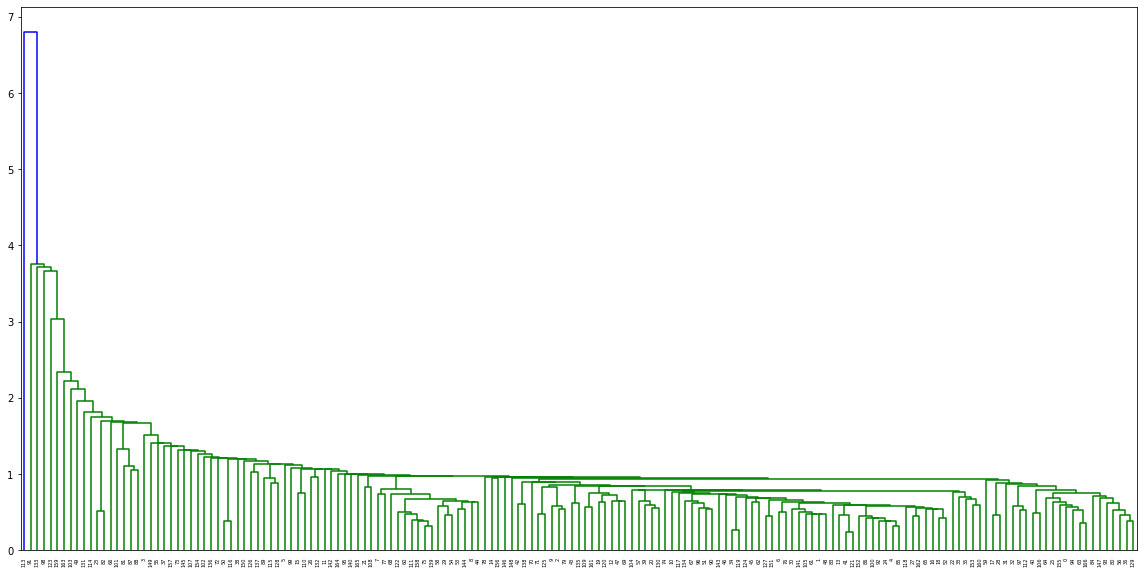

In [121]:
plt.figure(figsize=(20,10))
dendrogram(single_linkage)
plt.show()

In [122]:
single_cluster_labels=cut_tree(single_linkage,n_clusters=4).reshape(-1,)

In [123]:
transformed_df['ClusterId(Single)']=single_cluster_labels

In [124]:
Countries_df['ClusterId(Single)']=single_cluster_labels

In [125]:
Countries_df.groupby('ClusterId(Single)').count()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
ClusterId(Single),,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164
1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1


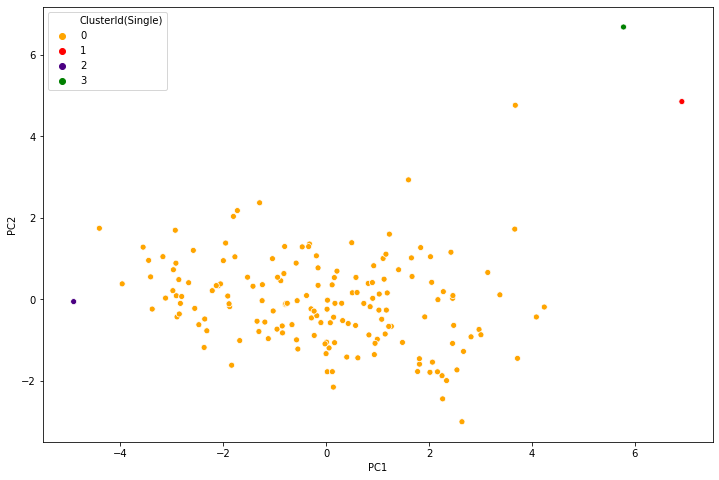

In [126]:
clusterplot(transformed_df,'ClusterId(Single)',colors_map4)

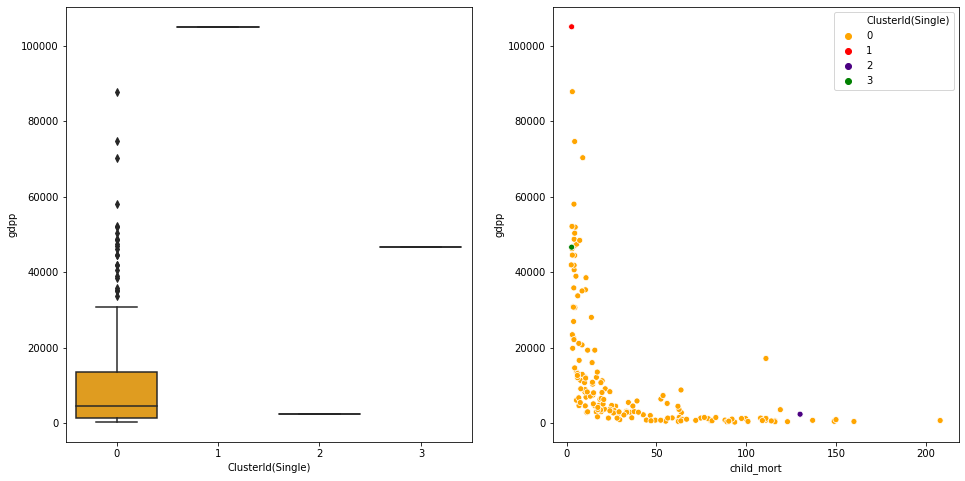

In [127]:
box_scatterplot(Countries_df,colors_map4,'ClusterId(Single)','gdpp','child_mort')

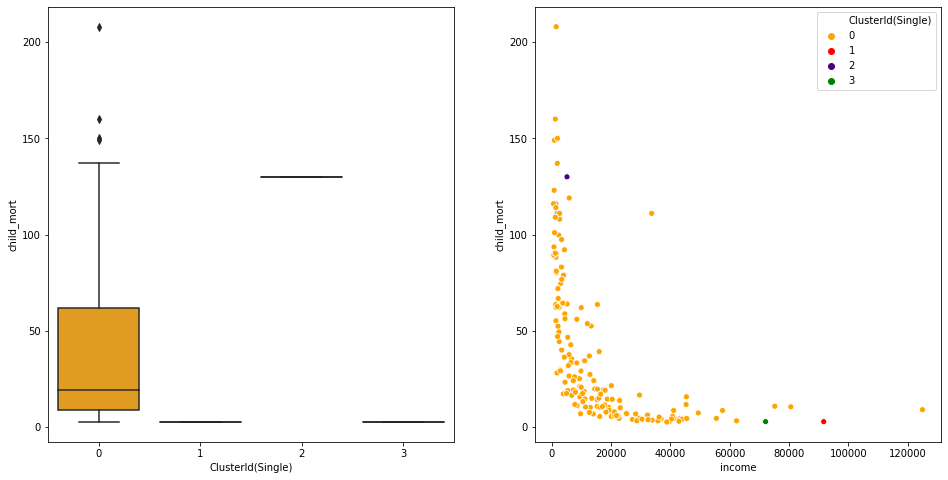

In [128]:
box_scatterplot(Countries_df,colors_map4,'ClusterId(Single)','child_mort','income')

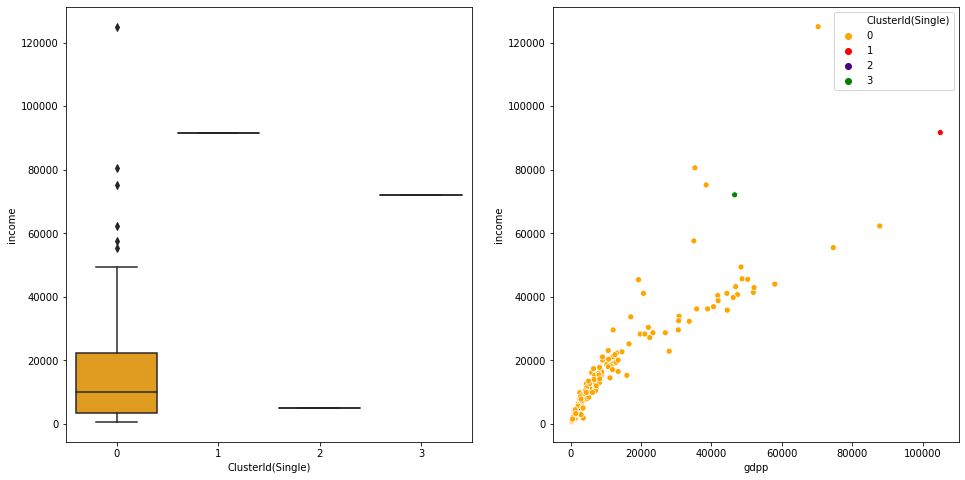

In [129]:
box_scatterplot(Countries_df,colors_map4,'ClusterId(Single)','income','gdpp')

In [130]:
# countries with ClusterId(Single) as 2 are in need of finanical need

In [131]:
Countries_df[Countries_df['ClusterId(Single)']==2]['country']

113    Nigeria
Name: country, dtype: object

In [132]:
len(Countries_df[Countries_df['ClusterId(Single)']==2]['country'])

1

In [133]:
# single linakge using transformed data without outliers after pca

In [134]:
transformed_df_without_outliers_after_pca.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2


In [135]:
single_linkage_without_outliers_after_pca=linkage(transformed_df_without_outliers_after_pca.iloc[:,:5],method='single')

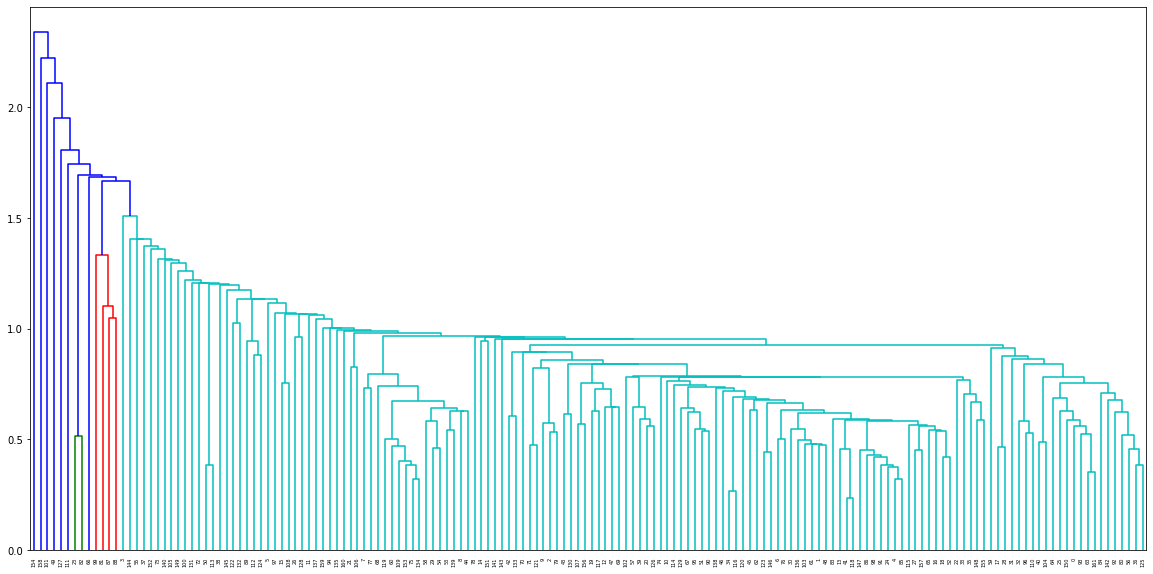

In [136]:
plt.figure(figsize=(20,10))
dendrogram(single_linkage_without_outliers_after_pca)
plt.show()

In [145]:
single_cluster_labels_without_outlier_after_pca=cut_tree(single_linkage_without_outliers_after_pca,n_clusters=5).reshape(-1,)

In [146]:
Countries_df_without_outliers_after_pca['ClusterId(Single)']=single_cluster_labels_without_outlier_after_pca

In [147]:
transformed_df_without_outliers_after_pca['ClusterId(Single)']=single_cluster_labels_without_outlier_after_pca

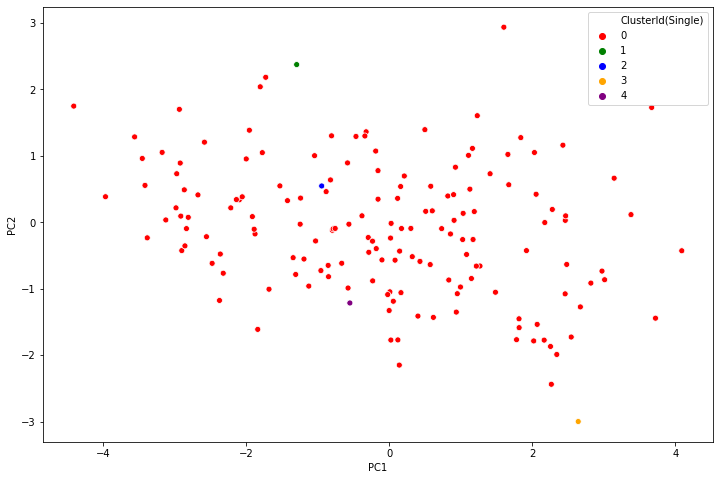

In [148]:
clusterplot(transformed_df_without_outliers_after_pca,'ClusterId(Single)',colors_map5)

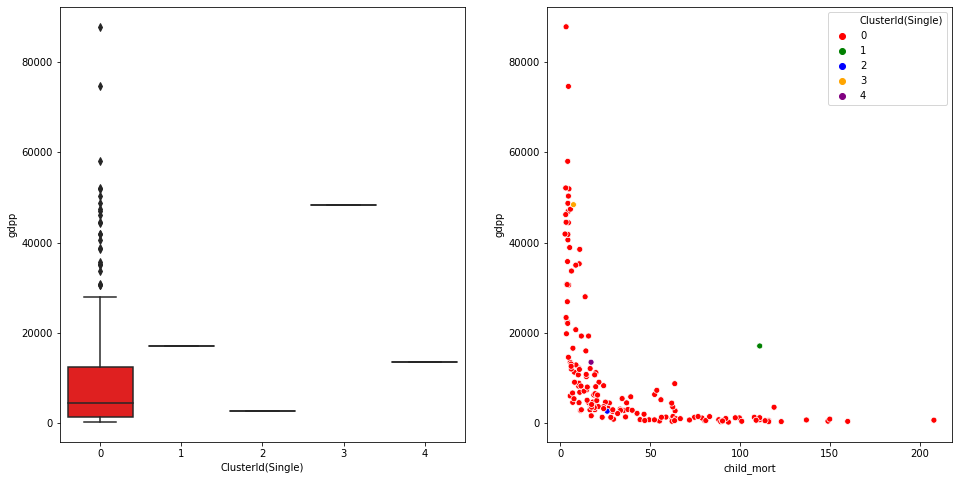

In [149]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map5,'ClusterId(Single)','gdpp','child_mort')

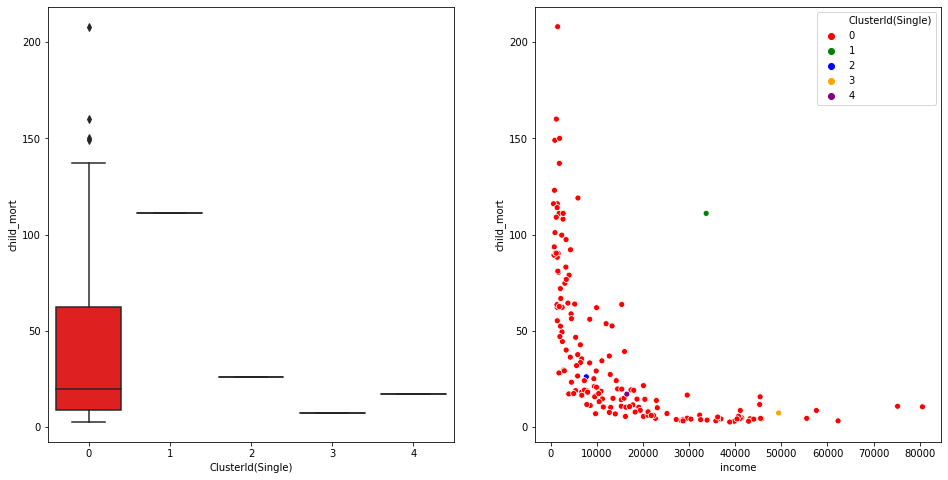

In [150]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map5,'ClusterId(Single)','child_mort','income')

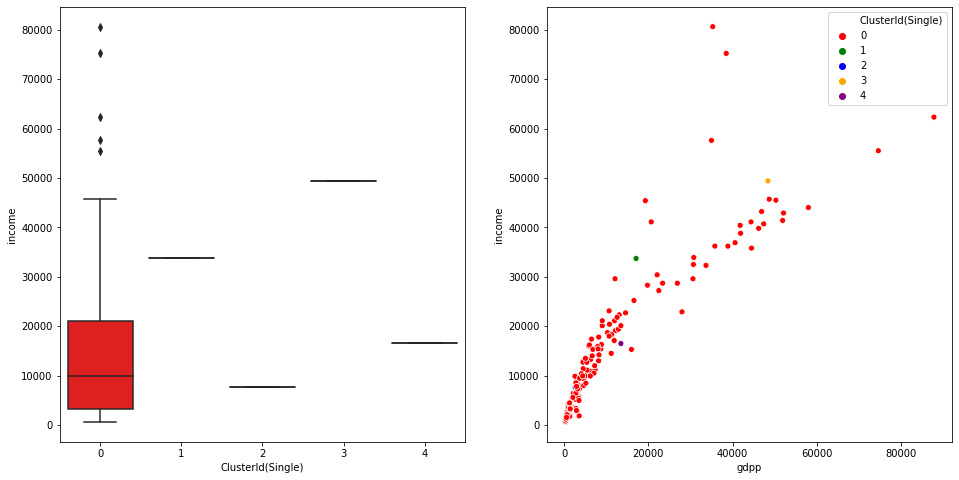

In [151]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map5,'ClusterId(Single)','income','gdpp')

In [152]:
Countries_df_without_outliers_after_pca.groupby('ClusterId(Single)').count()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
ClusterId(Single),,,,,,,,,,,
0,158,158,158,158,158,158,158,158,158,158,158
1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1


In [153]:
Countries_df_without_outliers_after_pca[Countries_df_without_outliers_after_pca['ClusterId(Single)']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId,ClusterId(Single)
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100,1,1


In [154]:
# Single linkage clusters are not tight and formed clusters are not as desired

### Complete linkage

In [156]:
transformed_df.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId,ClusterId(Single)
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,3,0
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,3,0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1,0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,3,0


In [157]:
complete_linkage=linkage(transformed_df.iloc[:,:5],method='complete')

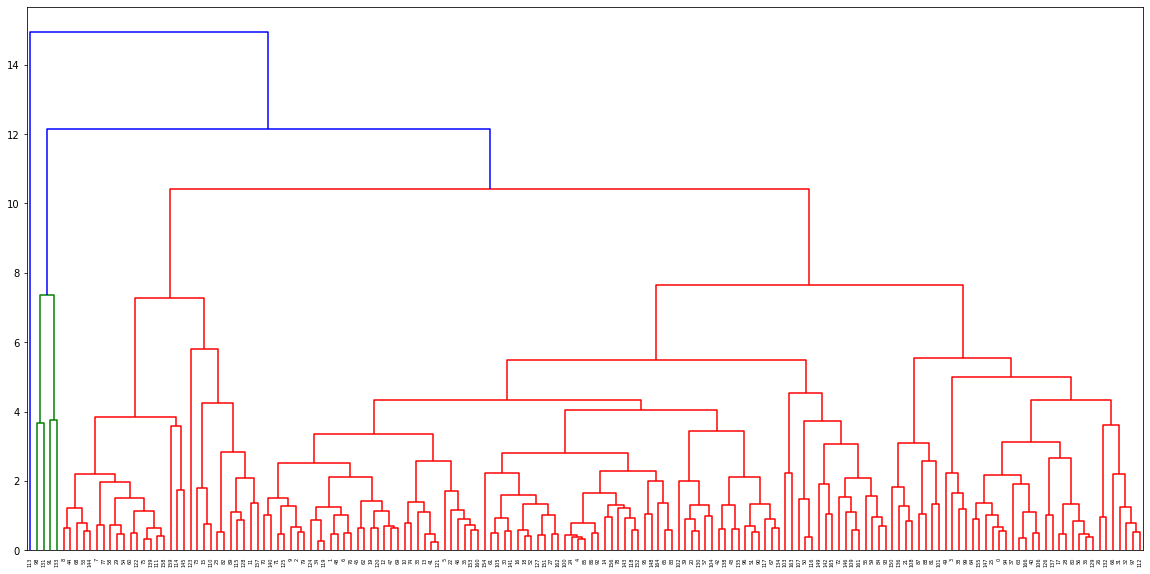

In [158]:
plt.figure(figsize=(20,10))
dendrogram(complete_linkage)
plt.show()

In [184]:
complete_cluster_labels=cut_tree(complete_linkage,n_clusters=5).reshape(-1,)

In [185]:
Countries_df['ClusterId(complete)']=complete_cluster_labels

In [186]:
transformed_df['ClusterId(complete)']=complete_cluster_labels

In [187]:
Countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId,ClusterId(Single),ClusterId(complete)
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,0,1


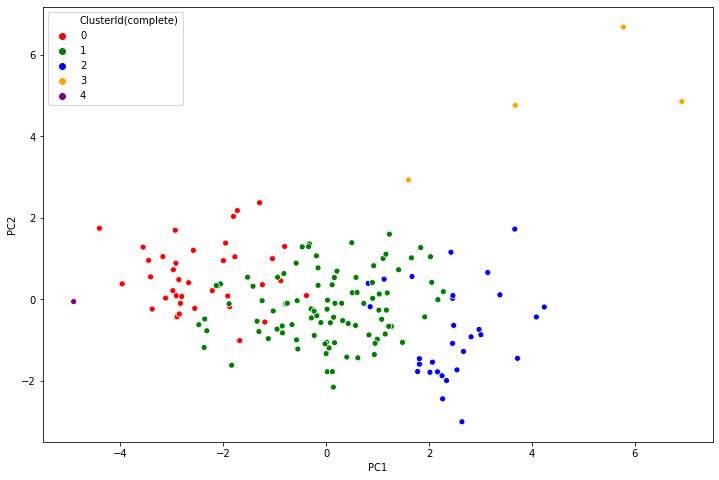

In [188]:
clusterplot(transformed_df,'ClusterId(complete)',colors_map5)

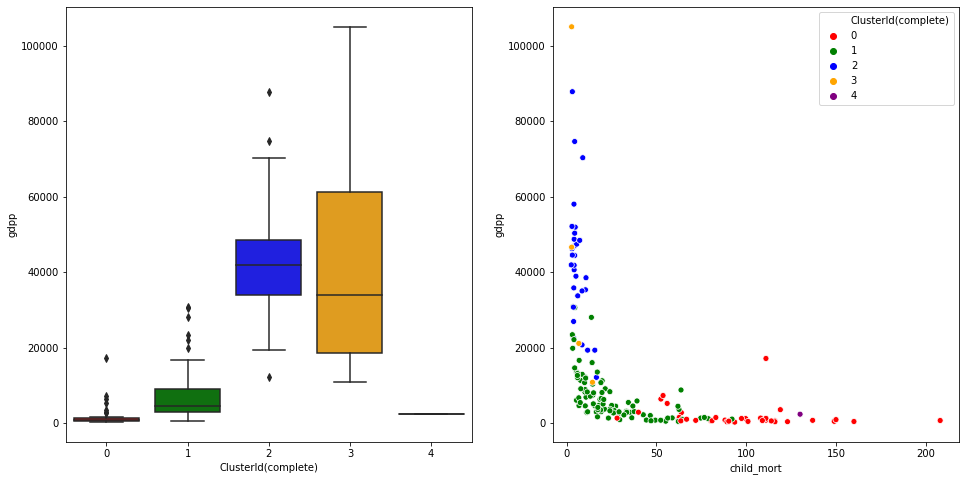

In [189]:
box_scatterplot(Countries_df,colors_map5,'ClusterId(complete)','gdpp','child_mort')

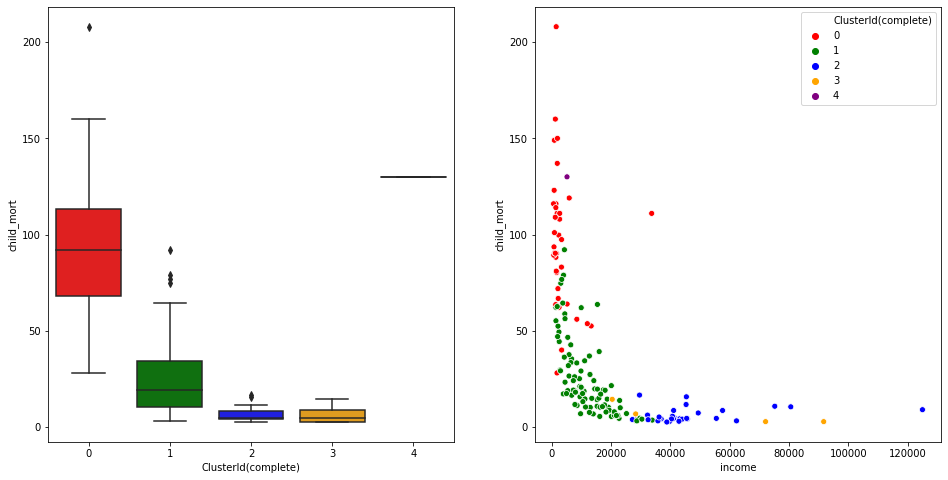

In [190]:
box_scatterplot(Countries_df,colors_map5,'ClusterId(complete)','child_mort','income')

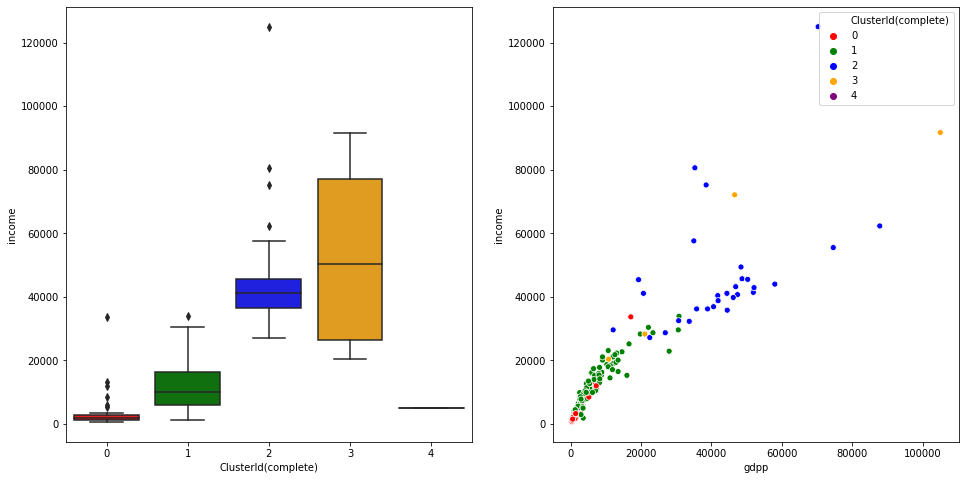

In [191]:
box_scatterplot(Countries_df,colors_map5,'ClusterId(complete)','income','gdpp')

In [192]:
# countries with ClusterId(complete) as 0 are in need of finanical need

In [193]:
Countries_df.groupby('ClusterId(complete)').count()['country']

ClusterId(complete)
0    38
1    94
2    30
3     4
4     1
Name: country, dtype: int64

In [194]:
Countries_df[Countries_df['ClusterId(complete)']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
56                       Gambia
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
87                      Lesotho
88                      Liberia
94                       Malawi
97                         Mali
99                   Mauritania
101       Micronesia, Fed. Sts.
106                  Mozambique
108                     Namibia
112                       Niger
126                      Rwanda
129                     Senegal
132     

In [195]:
Countries_df[Countries_df['ClusterId(complete)']==4]['country']

113    Nigeria
Name: country, dtype: object

In [197]:
# complete linakge using transformed data without outliers after pca

In [198]:
transformed_df_without_outliers_after_pca.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId,ClusterId(Single)
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2,0
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2,0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1,0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2,0


In [199]:
complete_linkage_without_outliers_after_pca=linkage(transformed_df_without_outliers_after_pca.iloc[:,:5],method='complete')

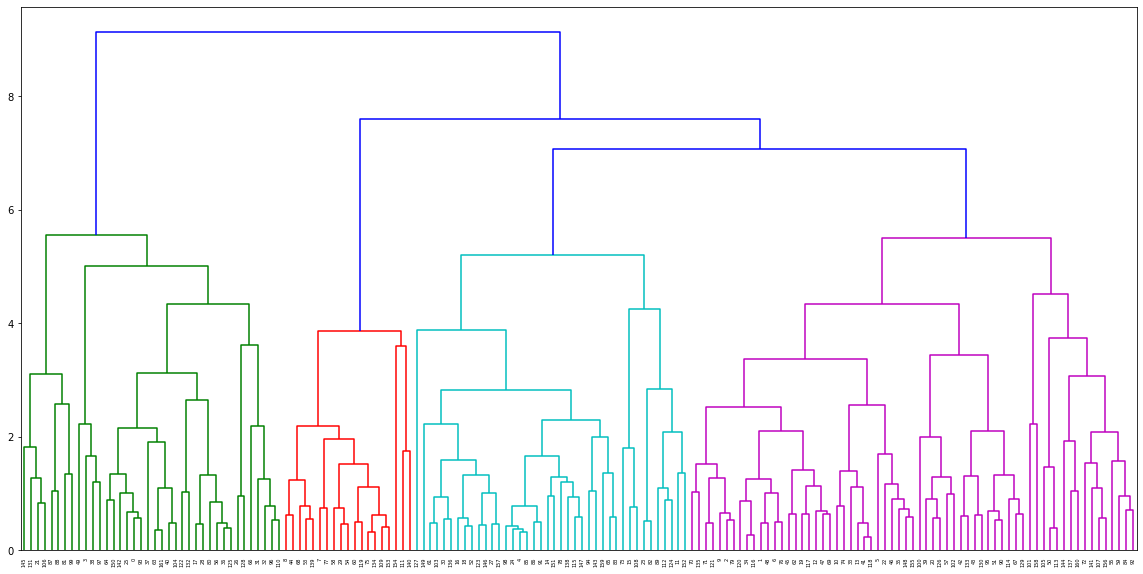

In [200]:
plt.figure(figsize=(20,10))
dendrogram(complete_linkage_without_outliers_after_pca)
plt.show()

In [226]:
complete_cluster_labels_without_outliers_after_pca=cut_tree(complete_linkage_without_outliers_after_pca,
                                                            n_clusters=3).reshape(-1,)

In [227]:
Countries_df_without_outliers_after_pca['ClusterId(complete)']=complete_cluster_labels_without_outliers_after_pca

In [228]:
transformed_df_without_outliers_after_pca['ClusterId(complete)']=complete_cluster_labels_without_outliers_after_pca

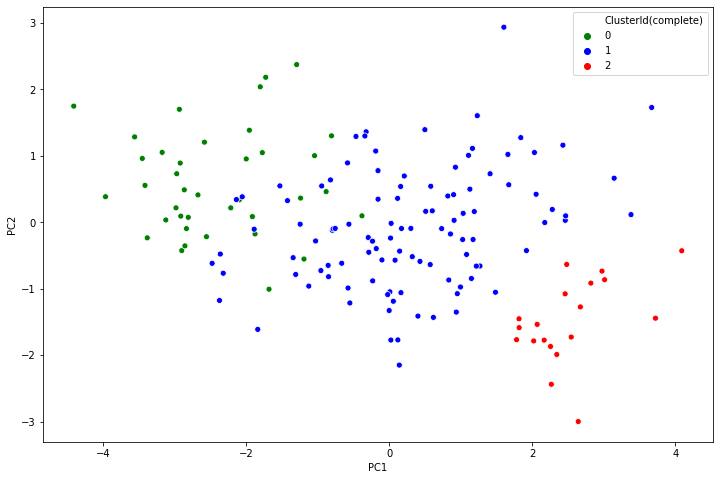

In [229]:
clusterplot(transformed_df_without_outliers_after_pca,'ClusterId(complete)',colors_map3)

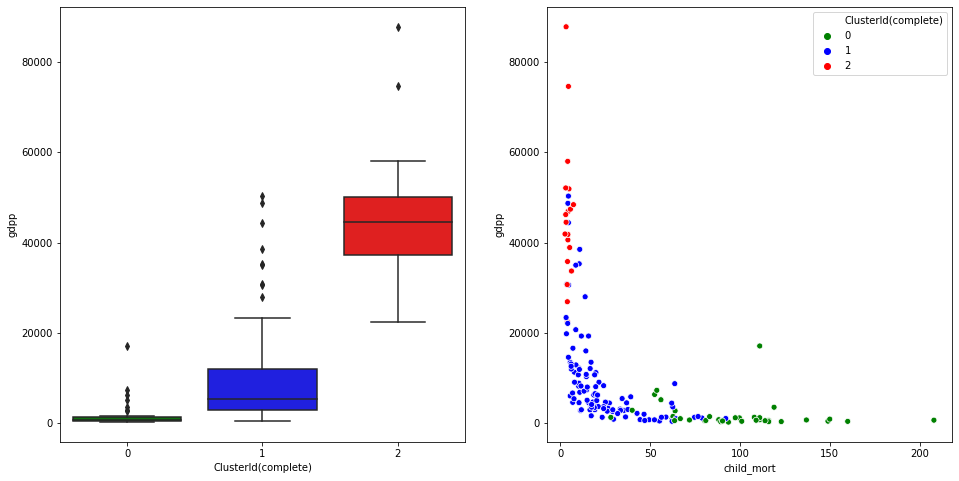

In [230]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map3,'ClusterId(complete)','gdpp','child_mort')

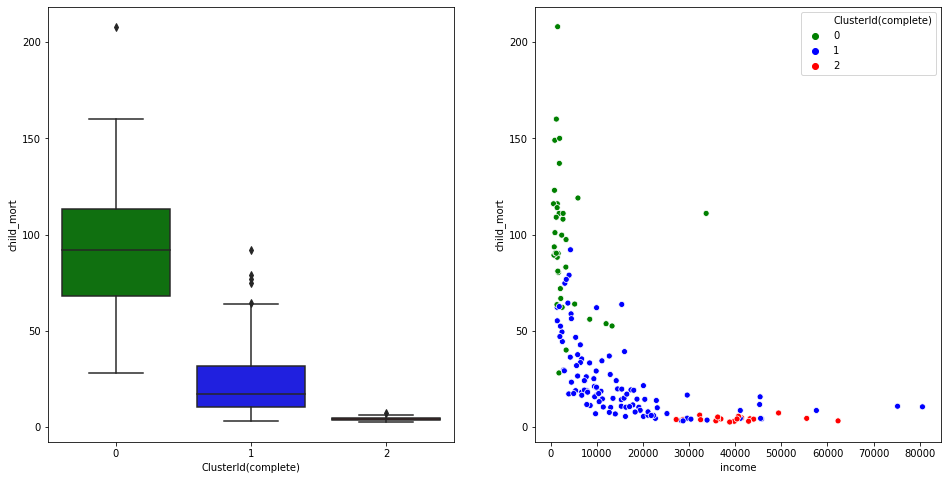

In [231]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map3,'ClusterId(complete)','child_mort','income')

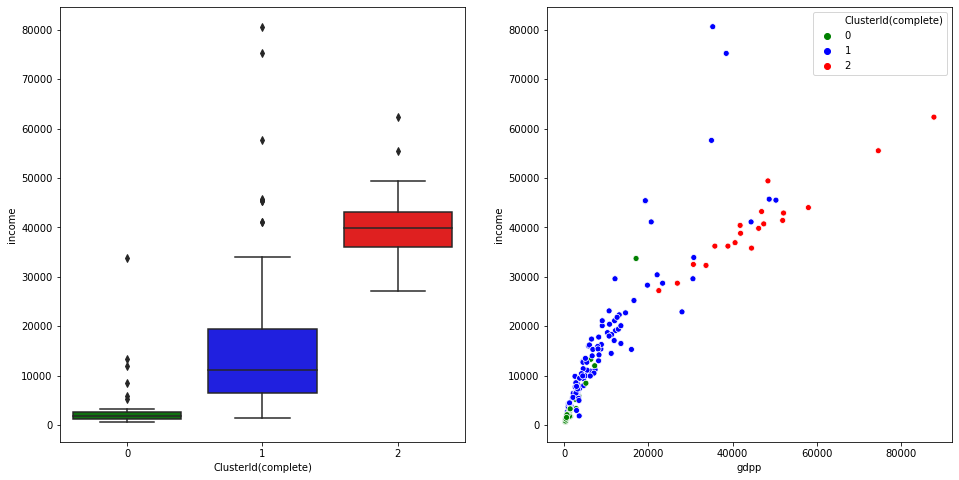

In [232]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map3,'ClusterId(complete)','income','gdpp')

In [233]:
Countries_df_without_outliers_after_pca.groupby('ClusterId(complete)').count()['country']#angola,

ClusterId(complete)
0     38
1    105
2     19
Name: country, dtype: int64

In [234]:
Countries_df_without_outliers_after_pca[Countries_df_without_outliers_after_pca['ClusterId(complete)']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId,ClusterId(Single),ClusterId(complete)
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,0,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,0,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,0,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1,0,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,0,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,0,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1,0,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1,0,0
